In [1]:
import os
from simple_settings import settings
import pandas as pd

In [2]:
HEADERS = {
    "Acquisition": [
        "id",
        "channel",
        "seller",
        "interest_rate",
        "balance",
        "loan_term",
        "origination_date",
        "first_payment_date",
        "ltv",
        "cltv",
        "borrower_count",
        "dti",
        "borrower_credit_score",
        "first_time_homebuyer",
        "loan_purpose",
        "property_type",
        "unit_count",
        "occupancy_status",
        "property_state",
        "zip",
        "insurance_percentage",
        "product_type",
        "co_borrower_credit_score",
        "mortgage_insurance_type",
        "relocation_mortgage_indicator"
    ],
    "Performance": [
        "id",
        "reporting_period",
        "servicer_name",
        "interest_rate",
        "balance",
        "loan_age",
        "months_to_maturity",
        "adjusted_maturity",
        "maturity_date",
        "msa",
        "delinquency_status",
        "modification_flag",
        "zero_balance_code",
        "zero_balance_date",
        "last_paid_installment_date",
        "foreclosure_date",
        "disposition_date",
        "foreclosure_costs",
        "property_repair_costs",
        "recovery_costs",
        "misc_costs",
        "tax_costs",
        "sale_proceeds",
        "credit_enhancement_proceeds",
        "repurchase_proceeds",
        "other_foreclosure_proceeds",
        "non_interest_bearing_balance",
        "principal_forgiveness_balance",
        "repurchase_make_whole_proceed_flag",
        "forclosure_principal write-off amount",
        "servicing_activity_indicator"
    ]
}

SELECT = {
    "Acquisition": HEADERS["Acquisition"],
    "Performance": [
        'id','reporting_period','servicer_name','balance','loan_age','maturity_date','delinquency_status',
                     'foreclosure_date','disposition_date'
    ]
}

In [8]:
#Merging the dataset in all the child directories and outputting the same to the defined folder
import os,glob,fileinput
import pandas as pd
from shutil import copyfile

def concatenate():
    with open("Acquisition_output.txt", "w") as a:

        for path, subdirs, files in os.walk(r'D:\loan-prediction-masterssss\data_year2014'):
            files = [ fi for fi in files if fi.startswith("Acquisition") ]
            for filename in files:
                f = os.path.join(path, filename)
                print(f)

                with open(f) as fin:
                    for line in fin:
                        a.write(line)

                total_line_count = sum(1 for line in open(f))
                print(total_line_count)

concatenate()

copyfile("Acquisition_output.txt", 'D:\loan-prediction-masterssss\data_year2014\Acquisition_output.txt')

total_line_count1 = sum(1 for line in open('Acquisition_output.txt'))
print(total_line_count1)

os.remove("Acquisition_output.txt")

D:\loan-prediction-masterssss\data_year2014\2014Q1\Acquisition_2014Q1.txt
274821
D:\loan-prediction-masterssss\data_year2014\2014Q2\Acquisition_2014Q2.txt
326158
D:\loan-prediction-masterssss\data_year2014\2014Q3\Acquisition_2014Q3.txt
394356
D:\loan-prediction-masterssss\data_year2014\2014Q4\Acquisition_2014Q4.txt
400030
1395365


In [9]:
#Selecting the columns and saving the acquisition file
data = pd.read_csv('D:\loan-prediction-masterssss\data_year2014\combined\Acquisition_output.txt', sep="|", 
                   header=None,names=HEADERS['Acquisition'])
data = data[SELECT['Acquisition']]

data.to_csv('D:\loan-prediction-masterssss\data_year2014\combined\Acquisition_2014Q1to2014Q4.csv', sep='|',
            header=SELECT['Acquisition'], index=False)

#print(data.head(5))

In [ ]:
#Selecting the columns and saving the performance file
data = pd.read_csv(r'D:\loan-prediction-masterssss\data_year2014\combined\Performance_output.txt', sep="|", 
                   header=None,names=HEADERS['Performance'],low_memory=False)
data = data[SELECT['Performance']]
data.to_csv(r'D:\loan-prediction-masterssss\data_year2014\combined\Performance_output_col.txt', sep='|',
            header=SELECT['Performance'], index=False, mode='w')

#print(data.head(5))

C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
#Total number of observations
total_line_count = sum(1 for line in open(r"D:/loan-prediction-masterssss/data_year2014/combined/Acquisition_2014Q1to2014Q4.csv"))
print("Total number of Acquisition observations - ",total_line_count)
#13,95,366

total_line_count = sum(1 for line in open(r"D:/loan-prediction-masterssss/data_year2014/combined/Performance_2014Q1to2014Q4.csv"))
print("Total number of Performance observations - ",total_line_count)
#13,95,366

Total number of Acquisition observations -  1395366
Total number of Performance observations -  1395366


In [3]:
#Getting the required columns and taking only the recent records based on the reporting period of the performance dataset

import numpy as np
#nos = int(input('Enter the number of lines to be read in the performance dataset - '))
#file = open(r"D:/loan-prediction-masterssss/data_year2014/2014Q1/Performance_2014Q1.txt", "r")
#with open(r"D:/loan-prediction-masterssss/data_year2014/2014Q1/Performance_2014Q1_col.txt", "w") as outfile:
#    for i in range(nos):
#        input_file = file.readline()
#        outfile.write(input_file)
    #print(image_file)


#Create the headers for the saved file
import pandas as pd
data = pd.read_table(r'D:/loan-prediction-masterssss/data_year2014/2014Q4/Performance_2014Q4.txt', sep="|", 
                   header=None,names=HEADERS['Performance'],low_memory=False)

#Selecting the specific columns in the dataset
data = data[['id','reporting_period','servicer_name','balance','loan_age','maturity_date','delinquency_status',
               'foreclosure_date','disposition_date']]

#Converting the reporting period to date field
data['reporting_period'] = pd.to_datetime(data['reporting_period'])
data['foreclosure_date'] = pd.to_datetime(data['foreclosure_date'])
#print(data.head())

#Filtering only to pull the foreclosed loan
#data2 = data[data.id==105500404289]
data3 = data.sort_values(by='reporting_period',ascending=False)
data4 = data3.drop_duplicates('id')
data4.to_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Performance_2014Q4_col_rec.csv',
             header=True, index=False, sep='|', mode='w')
    
print(data4.head())

Count_Row=data4.shape[0] #gives number of row count
Count_Col=data4.shape[1] #gives number of col count

print('The number of observations in the dataset are - ',Count_Row)
print('The number of variables in the dataset are - ',Count_Col)
#print(data4[data4.foreclosure_date.notnull()])
#print(data4[data4.id==105500404289])
#print(data.delinquency_status.unique())


                   id reporting_period servicer_name    balance  loan_age  \
1141703  191396375188       2017-06-01           NaN  114102.04        30   
9446152  859747368832       2017-06-01           NaN   96119.90        31   
5392557  532722869289       2017-06-01           NaN   58610.79        29   
5392505  532719127335       2017-06-01           NaN  266640.82        32   
1265376  201475376355       2017-06-01           NaN  293759.87        32   

        maturity_date delinquency_status foreclosure_date disposition_date  
1141703       12/2044                  X              NaT              NaN  
9446152       11/2044                  0              NaT              NaN  
5392557       01/2030                  0              NaT              NaN  
5392505       10/2044                  0              NaT              NaN  
1265376       10/2044                  0              NaT              NaN  
The number of observations in the dataset are -  400030
The number of varia

In [6]:
#Combining the performace multiple datasets into one

import pandas as pd

data1 = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Performance_2014Q1_col_rec.csv',sep='|',low_memory=False)
data2 = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Performance_2014Q2_col_rec.csv',sep='|',low_memory=False)
data3 = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Performance_2014Q3_col_rec.csv',sep='|',low_memory=False)
data4 = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Performance_2014Q4_col_rec.csv',sep='|',low_memory=False)
concat = pd.concat([data1, data2,data3,data4], axis=0)

print('The number of observations in the dataset are - ',data1.shape[0])
print('The number of observations in the dataset are - ',data2.shape[0])
print('The number of observations in the dataset are - ',data3.shape[0])
print('The number of observations in the dataset are - ',data4.shape[0])

concat.to_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Performance_2014Q1to2014Q4.csv',
             header=True, index=False, sep='|', mode='w')
    
print(concat.head())

Count_Row=concat.shape[0] #gives number of row count
Count_Col=concat.shape[1] #gives number of col count

print('The number of observations in the dataset are - ',Count_Row)
print('The number of variables in the dataset are - ',Count_Col)

The number of observations in the dataset are -  274821
The number of observations in the dataset are -  326158
The number of observations in the dataset are -  394356
The number of observations in the dataset are -  400030
             id reporting_period servicer_name    balance  loan_age  \
0  999997660860       2017-06-01           NaN  250823.12        41   
1  744117147714       2017-06-01           NaN  111355.21        42   
2  184890816825       2017-06-01           NaN   38197.84        39   
3  116607411106       2017-06-01           NaN  329574.66        39   
4  744103162368       2017-06-01           NaN   78437.92        39   

  maturity_date delinquency_status foreclosure_date disposition_date  
0       01/2044                  0              NaN              NaN  
1       12/2043                  0              NaN              NaN  
2       03/2029                  0              NaN              NaN  
3       03/2044                  0              NaN              

In [12]:
data1 = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Acquisition_2014Q1to2014Q4.csv',sep='|',low_memory=False)
data2 = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Performance_2014Q1to2014Q4.csv',sep='|',low_memory=False)


print("The number of observations in the acquisition dataset - ", data1.shape[0])
#print(data1.head())
print("The number of observations in the performance dataset - ", data2.shape[0])
#print(data2.head())

#data1.columns
#data2.columns

The number of observations in the acquisition dataset -  1395365
The number of observations in the performance dataset -  1395365


In [33]:
#Combining the acquisition dataset and performance dataset and saving as merged_inner

import math
import numpy as np

merged_inner = pd.merge(left=data1,right=data2, left_on='id', right_on='id')
merged_inner['foreclosure_Status'] = np.where(pd.isnull(merged_inner['foreclosure_date']), 0, 1)
merged_inner

merged_inner.to_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Acquisition_Performance_2014Q1to2014Q4.csv',
             header=True, index=False, sep='|', mode='w')

merged_inner.shape[0]
merged_inner

#merged_left = pd.merge(left=data1,right=data2, how='left', left_on='id', right_on='id')
#merged_left

#merged_right = pd.merge(left=data1,right=data2, how='right', left_on='id', right_on='id')
#merged_right

#merged_full_outer = pd.merge(left=data1,right=data2, how='outer', left_on='id', right_on='id')
#merged_full_outer

,id,channel,seller,interest_rate,balance_x,loan_term,origination_date,first_payment_date,ltv,cltv,...,relocation_mortgage_indicator,reporting_period,servicer_name,balance_y,loan_age,maturity_date,delinquency_status,foreclosure_date,disposition_date,foreclosure_Status
0,100000506220,R,OTHER,4.750,328000,360,02/2014,04/2014,80,80.0,...,N,2016-10-01,NaN,311918.69,31,03/2044,X,NaN,NaN,0
1,100006392566,R,"PNC BANK, N.A.",3.500,276000,180,01/2014,03/2014,68,68.0,...,N,2017-06-01,NaN,226514.30,40,02/2029,0,NaN,NaN,0
2,100007679737,R,OTHER,5.000,190000,360,02/2014,04/2014,80,80.0,...,N,2017-06-01,NaN,172144.99,39,03/2044,0,NaN,NaN,0
3,100008410787,C,FREEDOM MORTGAGE CORP.,4.375,320000,360,12/2013,02/2014,80,80.0,...,N,2016-01-01,NaN,309625.68,24,01/2044,X,NaN,NaN,0
4,100009360302,C,OTHER,5.250,92000,360,01/2014,03/2014,80,80.0,...,N,2017-06-01,NaN,87630.98,40,02/2044,0,NaN,NaN,0
5,100013156268,C,OTHER,4.625,82000,180,01/2014,03/2014,78,78.0,...,N,2017-06-01,NaN,68056.96,40,02/2029,0,NaN,NaN,0
6,100014615428,C,OTHER,4.875,184000,300,02/2014,04/2014,80,80.0,...,N,2014-08-01,NaN,184000.00,5,03/2039,X,NaN,NaN,0
7,100018134297,R,OTHER,4.375,176000,360,12/2013,02/2014,80,80.0,...,N,2017-06-01,NaN,109532.64,41,01/2044,0,NaN,NaN,0
8,100018812676,R,OTHER,4.375,238000,360,02/2014,04/2014,49,49.0,...,N,2014-12-01,NaN,233134.67,9,03/2044,X,NaN,NaN,0
9,100023715413,C,"PACIFIC UNION FINANCIAL, LLC",5.000,231000,360,01/2014,03/2014,95,95.0,...,N,2015-12-01,NaN,224775.88,22,02/2044,X,NaN,NaN,0


In [ ]:
#def f(row):
#    if row['foreclosure_date'] == " ":
#        val = 0
#    else:
#        val = 1
#    return val

#merged_inner['foreclosure_Status'] = merged_inner.apply(f, axis=1)

#merged_inner.shape[0]
#merged_inner

In [1]:
# chk = merged_inner[merged_inner.id==891263453643]
# chk[['id','reporting_period','foreclosure_Status']]

import pandas as pd
data = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Acquisition_Performance_2014Q1to2014Q4.csv',
                   sep='|',low_memory=False)


print("The number of observations in the acquisition dataset - ", data.shape[0])
#print(data.head())

data["foreclosure_Status"].value_counts()

The number of observations in the acquisition dataset -  1395365


0    1394479
1        886
Name: foreclosure_Status, dtype: int64

In [294]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(data['foreclosure_Status'])
percentage_labels = (data['foreclosure_Status'].value_counts()/total_len)*100
percentage_labels

0    99.936504
1     0.063496
Name: foreclosure_Status, dtype: float64

In [179]:
response_variable = data['foreclosure_Status']
print ('No: of zeor responses: %d' %sum(response_variable == 0))
print ('No of one responses: %d' %sum(response_variable == 1))

## If we create a simple model which always predicts zero, you will get
print ('Performance of always zero model: %f' %(round((sum(response_variable == 0))/ 
                                              (sum(response_variable == 0) + sum(response_variable == 1))*100,2)),'%')

print ('Performance of always one model: %f' %(round((sum(response_variable == 1))/ 
                                              (sum(response_variable == 0) + sum(response_variable == 1))*100,2)),'%')

No: of zeor responses: 1394479
No of one responses: 886
Performance of always zero model: 99.940000 %
Performance of always one model: 0.060000 %


In [2]:
data.groupby('foreclosure_Status').mean()

,id,interest_rate,balance_x,loan_term,ltv,cltv,borrower_count,dti,borrower_credit_score,unit_count,zip,insurance_percentage,co_borrower_credit_score,mortgage_insurance_type,balance_y,loan_age
foreclosure_Status,,,,,,,,,,,,,,,,
0,5.497745e+11,4.317005,213026.379028,315.638689,75.339285,75.951276,1.503136,33.661874,752.125938,1.034904,576.731176,25.347781,759.310878,1.138235,196307.104497,29.506931
1,5.494215e+11,4.620528,158876.975169,336.040632,85.609481,85.979684,1.212190,36.529345,712.451467,1.005643,536.313770,26.572519,713.844086,1.091603,155391.722477,26.009029


In [ ]:
# data.info()
data.dtypes

In [160]:
categorical = data.dtypes[data.dtypes == "object"]
Numerical = data.dtypes[data.dtypes != "object"]

print("The count of Categorical variables are - ", categorical.count())
print("The count of Numerical variables are - ", Numerical.count())

The count of Categorical variables are -  17
The count of Numerical variables are -  17


In [50]:
# print(data.describe())
data.describe()

,id,interest_rate,balance_x,loan_term,ltv,cltv,borrower_count,dti,borrower_credit_score,unit_count,zip,insurance_percentage,co_borrower_credit_score,mortgage_insurance_type,balance_y,loan_age,foreclosure_Status
count,1.395365e+06,1.395365e+06,1.395365e+06,1.395365e+06,1.395365e+06,1.395364e+06,1.395365e+06,1.395003e+06,1.394609e+06,1.395365e+06,1.395365e+06,397581.000000,693562.000000,397581.000000,1.395346e+06,1.395365e+06,1.395365e+06
mean,5.497743e+11,4.317198e+00,2.129920e+05,3.156516e+02,7.534581e+01,7.595764e+01,1.502952e+00,3.366370e+01,7.521007e+02,1.034885e+00,5.767055e+02,25.349395,759.298684,1.138173,1.962812e+05,2.950471e+01,6.349593e-04
std,2.598905e+11,4.967363e-01,1.155685e+05,7.883421e+01,1.624576e+01,1.618602e+01,5.123280e-01,8.920844e+00,4.710093e+01,2.526400e-01,2.992667e+02,6.907787,44.340686,0.345082,1.130577e+05,9.656570e+00,2.519041e-02
min,1.000000e+11,2.250000e+00,8.000000e+03,6.000000e+01,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,4.930000e+02,1.000000e+00,6.000000e+00,1.000000,509.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.247024e+11,4.125000e+00,1.240000e+05,3.240000e+02,6.900000e+01,7.000000e+01,1.000000e+00,2.700000e+01,7.190000e+02,1.000000e+00,3.210000e+02,25.000000,731.000000,1.000000,1.099486e+05,2.600000e+01,0.000000e+00
50%,5.496949e+11,4.375000e+00,1.900000e+05,3.600000e+02,8.000000e+01,8.000000e+01,1.000000e+00,3.500000e+01,7.630000e+02,1.000000e+00,6.040000e+02,30.000000,771.000000,1.000000,1.732750e+05,3.200000e+01,0.000000e+00
75%,7.746202e+11,4.625000e+00,2.830000e+05,3.600000e+02,8.500000e+01,9.000000e+01,2.000000e+00,4.100000e+01,7.910000e+02,1.000000e+00,8.520000e+02,30.000000,795.000000,1.000000,2.631868e+05,3.600000e+01,0.000000e+00
max,9.999989e+11,6.375000e+00,1.203000e+06,3.600000e+02,9.700000e+01,1.050000e+02,8.000000e+00,5.800000e+01,8.500000e+02,4.000000e+00,9.990000e+02,40.000000,850.000000,2.000000,1.203000e+06,6.900000e+01,1.000000e+00


In [2]:
# df.dtypes.eq(object)
categorical = data.dtypes[data.dtypes == "object"].index
print(categorical)

data[categorical].describe()

Index(['channel', 'seller', 'origination_date', 'first_payment_date',
       'first_time_homebuyer', 'loan_purpose', 'property_type',
       'occupancy_status', 'property_state', 'product_type',
       'relocation_mortgage_indicator', 'reporting_period', 'servicer_name',
       'maturity_date', 'delinquency_status', 'foreclosure_date',
       'disposition_date'],
      dtype='object')


,channel,seller,origination_date,first_payment_date,first_time_homebuyer,loan_purpose,property_type,occupancy_status,property_state,product_type,relocation_mortgage_indicator,reporting_period,servicer_name,maturity_date,delinquency_status,foreclosure_date,disposition_date
count,1395365,1395365,1395365,1395365,1395365,1395365,1395365,1395365,1395365,1395365,1395365,1395365,8570,1395365,1394436,886,531
unique,3,25,36,36,2,4,5,3,54,1,2,41,18,352,38,33,27
top,R,OTHER,07/2014,08/2014,N,P,SF,P,CA,FRM,N,2017-06-01,FREEDOM MORTGAGE CORP.,08/2044,0,2017-03-01,03/01/2017
freq,825843,758180,135455,134785,1102704,811853,867413,1191335,217448,1395365,1380720,911193,1605,103888,886375,62,58


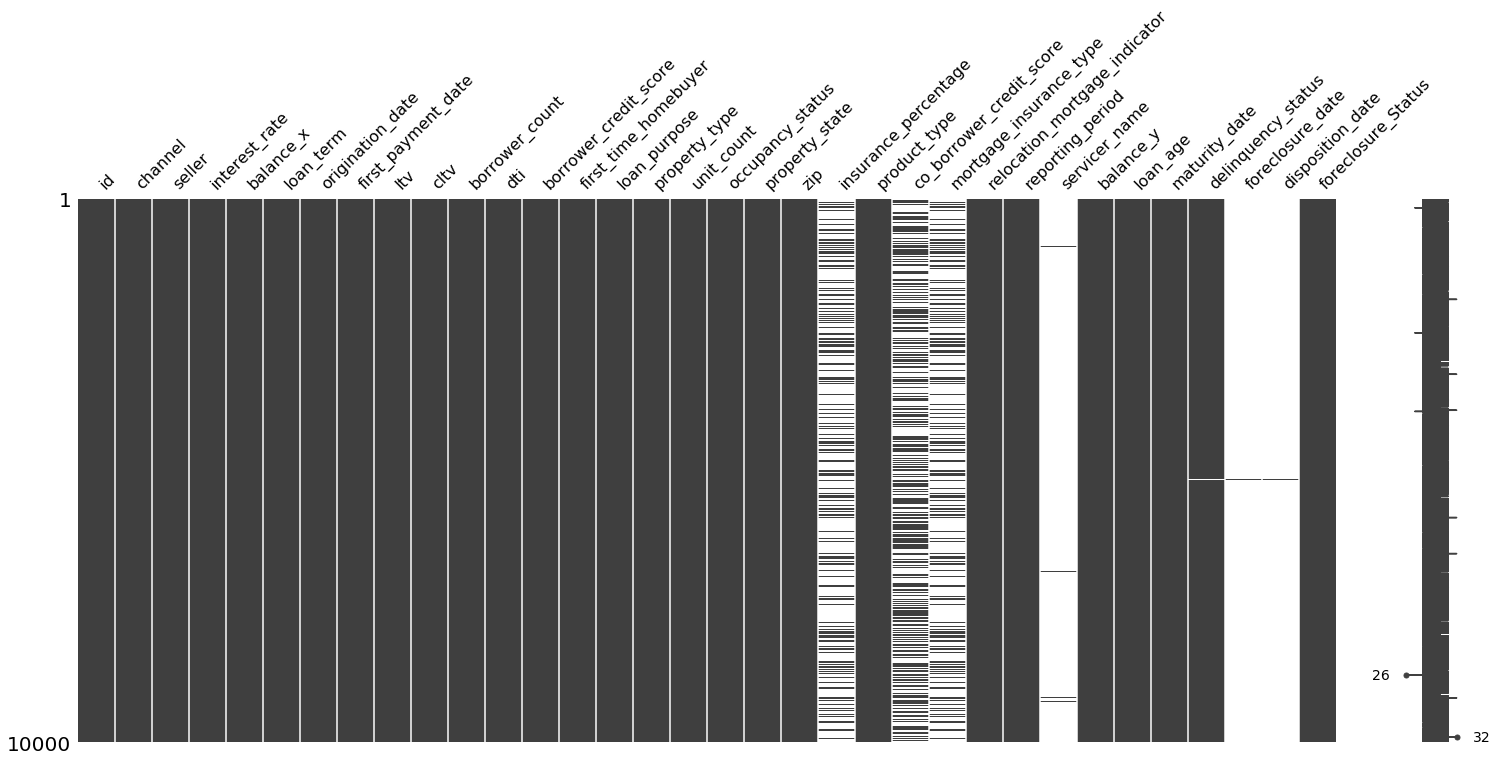

In [11]:
import missingno as msno
%matplotlib inline
msno.matrix(data.sample(10000))
# The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

In [ ]:
# msno.heatmap(data)
# The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects 
# the presence of another

# Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not 
# appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

In [ ]:
msno.dendrogram(data)
# The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their 
# nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on 
# which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer
# their total distance is to zero,and the closer their average distance (the y-axis) is to zero

In [ ]:
#Create a new function:
# def num_missing(x):
#     return sum(x.isnull())

#Applying per column:
# print ("Missing values per column:")
# print (data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

# print ("Total number of observations:" , data.shape[0])
# print ("Total number of columns:" , data.shape[1])

# data1.fillna(data1.mean(), inplace=True)

# data1.isnull().sum()

#Applying per row:
# print "\nMissing values per row:"
# print data.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row

In [3]:
# getting an overview of our data
print("Our data has {0} rows and {1} columns".format(data.shape[0], data.shape[1]))
# checking for missing values
print("Are there missing values? {}".format(data.isnull().any().any()))

Our data has 1395365 rows and 34 columns
Are there missing values? True


In [2]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
disposition_date,1394834,99.961945
foreclosure_date,1394479,99.936504
servicer_name,1386795,99.385824
mortgage_insurance_type,997784,71.507025
insurance_percentage,997784,71.507025
co_borrower_credit_score,701803,50.295299
delinquency_status,929,0.066578
borrower_credit_score,756,0.054179
dti,362,0.025943
balance_y,19,0.001362


In [ ]:
#dealing with missing data
# df_train = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
# df_train.shape[0]
# df_train.shape[1]
# df_train.columns

In [84]:
data1.columns

Index(['channel', 'seller', 'interest_rate', 'balance_x', 'loan_term',
       'origination_date', 'first_payment_date', 'ltv', 'cltv', 'dti',
       'borrower_credit_score', 'first_time_homebuyer', 'loan_purpose',
       'property_type', 'occupancy_status', 'property_state', 'product_type',
       'relocation_mortgage_indicator', 'reporting_period', 'balance_y',
       'loan_age', 'maturity_date', 'delinquency_status',
       'foreclosure_Status'],
      dtype='object')

In [2]:
data1 = data
print("Before - Number of records - ",data.shape[0])
print("Before - Number of columns - ",data.shape[1])

data1 = data1.drop(['insurance_percentage','co_borrower_credit_score','mortgage_insurance_type','servicer_name',
                 'foreclosure_date','disposition_date','zip','unit_count','borrower_count'],axis = 1)
print("\n")
print("After - Number of records - ",data1.shape[0])
print("After - Number of columns - ",data1.shape[1])
# data1.dtypes
# print(data1.head(5))

# data1

Before - Number of records -  1395365
Before - Number of columns -  34


After - Number of records -  1395365
After - Number of columns -  25


In [3]:
print(data["foreclosure_Status"].value_counts())
print("\n")
print(data1["foreclosure_Status"].value_counts())

0    1394479
1        886
Name: foreclosure_Status, dtype: int64


0    1394479
1        886
Name: foreclosure_Status, dtype: int64


In [4]:
# data2 = data1[data1['borrower_credit_score'].isnull() & (data1['dti'].isnull())]
# data2 = data2.iloc[:,[0,11,12]]
# data2

# df[df['first_name'].notnull() & (df['nationality'] == "USA")]

# data2 = data1.iloc[:,[0,1,11,12]]
# data2.iloc[1:5,:]


data1 = data1.fillna(0)
print("It is done")
# data3[data3['id']==304863390329]

# data3 = data2.fillna(data2.mean())
# data3[data3['id']==304863390329]


It is done


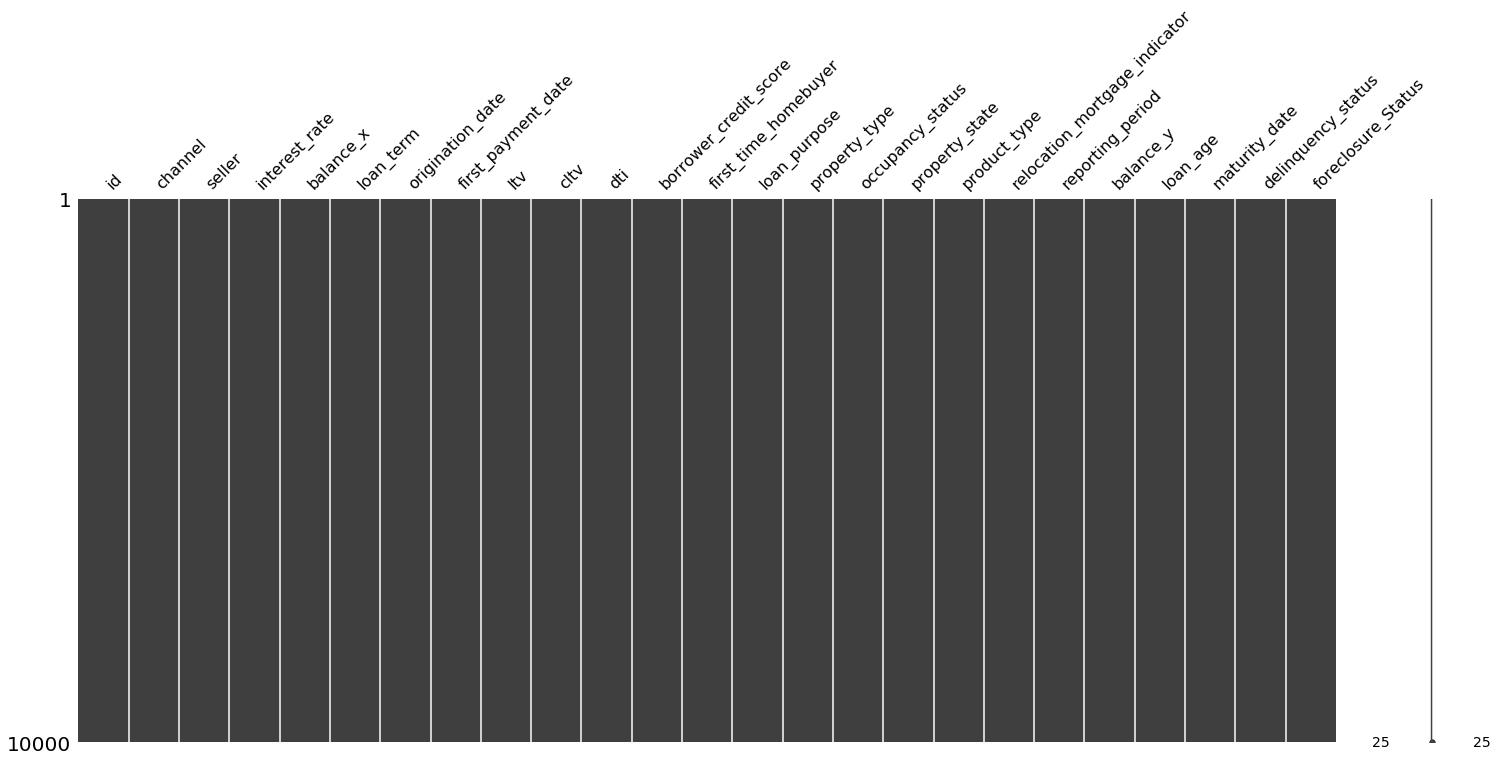

In [12]:
msno.matrix(data1.sample(10000))

In [5]:
#missing data
total = data1.isnull().sum().sort_values(ascending=False)
percent = (data1.isnull().sum()/data1.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
foreclosure_Status,0,0.0
borrower_credit_score,0,0.0
channel,0,0.0
seller,0,0.0
interest_rate,0,0.0


In [32]:
import pandas as pd

data1.to_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/data_missing_treated.csv',
             header = True, sep = '|',mode = 'w',index=False)

data1.shape
# data1.head(5)

(1395365, 25)

In [33]:
data1.head(5)

,id,channel,seller,interest_rate,balance_x,loan_term,origination_date,first_payment_date,ltv,cltv,...,occupancy_status,property_state,product_type,relocation_mortgage_indicator,reporting_period,balance_y,loan_age,maturity_date,delinquency_status,foreclosure_Status
0,100000506220,R,OTHER,4.750,328000,360,02/2014,04/2014,80,80.0,...,P,CA,FRM,N,2016-10-01,311918.69,31,03/2044,X,0
1,100006392566,R,"PNC BANK, N.A.",3.500,276000,180,01/2014,03/2014,68,68.0,...,P,VT,FRM,N,2017-06-01,226514.30,40,02/2029,0,0
2,100007679737,R,OTHER,5.000,190000,360,02/2014,04/2014,80,80.0,...,P,PA,FRM,N,2017-06-01,172144.99,39,03/2044,0,0
3,100008410787,C,FREEDOM MORTGAGE CORP.,4.375,320000,360,12/2013,02/2014,80,80.0,...,P,TX,FRM,N,2016-01-01,309625.68,24,01/2044,X,0
4,100009360302,C,OTHER,5.250,92000,360,01/2014,03/2014,80,80.0,...,I,AZ,FRM,N,2017-06-01,87630.98,40,02/2044,0,0


In [37]:
import pandas as pd

data1 = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/data_missing_treated.csv',
                   sep='|',low_memory=False)
#                     ,index_col = 0)
data1.shape
# data1.head(5)

(1395365, 25)

In [ ]:
data1.head(5)

In [39]:
numerical = data1.dtypes[data.dtypes != "object"].index
print(numerical)

Index(['id', 'interest_rate', 'balance_x', 'loan_term', 'ltv', 'cltv', 'dti',
       'borrower_credit_score', 'balance_y', 'loan_age', 'foreclosure_Status'],
      dtype='object')


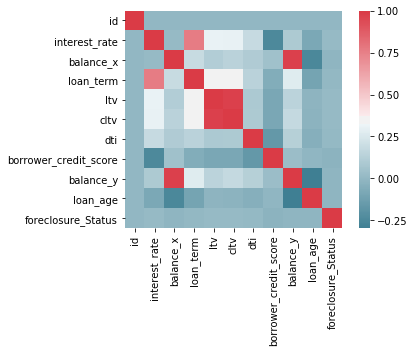

In [57]:
import seaborn as sns
corr = data1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,
            yticklabels=corr.columns.values)
plt.show()

In [8]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,interest_rate,balance_x,loan_term,ltv,cltv,dti,borrower_credit_score,balance_y,loan_age,foreclosure_Status
id,1,-0.00018,-6.8e-05,-0.00058,0.00028,0.00016,-0.00083,7.7e-05,-3.7e-05,-0.0009,-3.4e-05
interest_rate,-0.00018,1,0.018,0.76,0.31,0.31,0.18,-0.24,0.099,-0.078,0.015
balance_x,-6.8e-05,0.018,1,0.19,0.12,0.14,0.11,0.051,0.98,-0.25,-0.012
loan_term,-0.00058,0.76,0.19,1,0.34,0.35,0.14,-0.054,0.27,-0.1,0.0065
ltv,0.00028,0.31,0.12,0.34,1,0.98,0.094,-0.085,0.15,-0.017,0.016
cltv,0.00016,0.31,0.14,0.35,0.98,1,0.097,-0.087,0.18,-0.022,0.016
dti,-0.00083,0.18,0.11,0.14,0.094,0.097,1,-0.16,0.13,-0.042,0.0081
borrower_credit_score,7.7e-05,-0.24,0.051,-0.054,-0.085,-0.087,-0.16,1,0.029,-0.0037,-0.02
balance_y,-3.7e-05,0.099,0.98,0.27,0.15,0.18,0.13,0.029,1,-0.3,-0.0092
loan_age,-0.0009,-0.078,-0.25,-0.1,-0.017,-0.022,-0.042,-0.0037,-0.3,1,-0.0091


In [6]:
data2 = data1.drop(['id','balance_y','cltv','loan_term'],axis = 1)
print("Before - Number of records - ",data1.shape[0])
print("Before - Number of columns - ",data1.shape[1])
print("\n")
print("After - Number of records - ",data2.shape[0])
print("After - Number of columns - ",data2.shape[1])
print("\n")
numerical = data2.dtypes[data.dtypes != "object"].index
print(numerical)

Before - Number of records -  1395365
Before - Number of columns -  25


After - Number of records -  1395365
After - Number of columns -  21


Index(['interest_rate', 'balance_x', 'ltv', 'dti', 'borrower_credit_score',
       'loan_age', 'foreclosure_Status'],
      dtype='object')


In [7]:
print(data["foreclosure_Status"].value_counts())
print("\n")
print(data1["foreclosure_Status"].value_counts())
print("\n")
print(data2["foreclosure_Status"].value_counts())

0    1394479
1        886
Name: foreclosure_Status, dtype: int64


0    1394479
1        886
Name: foreclosure_Status, dtype: int64


0    1394479
1        886
Name: foreclosure_Status, dtype: int64


In [43]:
import pandas as pd

data2.to_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/data2_correlation_treated.csv',
             header = True, sep = '|',mode = 'w',index=False)

data2.shape
# data1.head(5)

(1395365, 21)

In [44]:
import pandas as pd

data2 = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/data2_correlation_treated.csv',
                   sep='|',low_memory=False)

data2.shape

(1395365, 21)

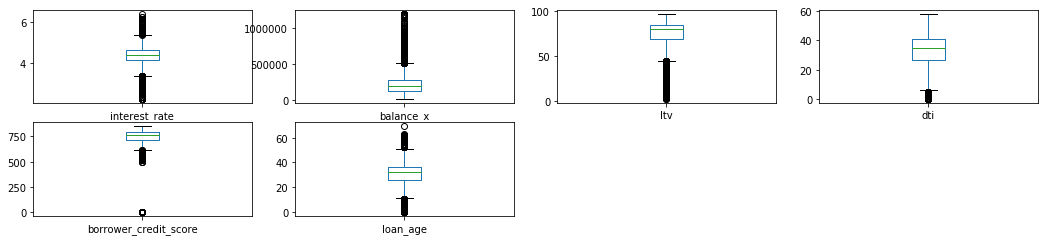

In [11]:
# Outlier detection - Graphically
import matplotlib.pyplot as plt
data2.iloc[:,0:20].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,10))
plt.show()

In [8]:
# Outlier detection - Qunatitativly
# Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
from scipy import stats
import numpy as np

df = data2
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
# print("\n")
# print(Q1)
# print("\n")
# print(Q3)

print("The outlier percentage for Interest rate is - " + "{:.2f}".format(((df.interest_rate < (Q1.interest_rate - 1.5 * IQR.interest_rate)) | (df.interest_rate > (Q3.interest_rate + 1.5 * IQR.interest_rate))).sum()/(df.interest_rate.shape[0])*100))
print("The outlier percentage for balance_x is - " + "{:.2f}".format(((df.balance_x < (Q1.balance_x - 1.5 * IQR.balance_x)) | (df.balance_x > (Q3.balance_x + 1.5 * IQR.balance_x))).sum()/(df.balance_x.shape[0])*100))
print("The outlier percentage for ltv is - " + "{:.2f}".format(((df.ltv < (Q1.ltv - 1.5 * IQR.ltv)) | (df.interest_rate > (Q3.ltv + 1.5 * IQR.ltv))).sum()/(df.ltv.shape[0])*100))
print("The outlier percentage for dti is - " + "{:.2f}".format(((df.dti < (Q1.dti - 1.5 * IQR.dti)) | (df.dti > (Q3.dti + 1.5 * IQR.dti))).sum()/(df.dti.shape[0])*100))
print("The outlier percentage for borrower_credit_score is - " + "{:.2f}".format(((df.borrower_credit_score < (Q1.borrower_credit_score - 1.5 * IQR.borrower_credit_score)) | (df.borrower_credit_score > (Q3.borrower_credit_score + 1.5 * IQR.borrower_credit_score))).sum()/(df.borrower_credit_score.shape[0])*100))
print("The outlier percentage for loan_age is - " + "{:.2f}".format(((df.loan_age < (Q1.loan_age - 1.5 * IQR.loan_age)) | (df.loan_age > (Q3.loan_age + 1.5 * IQR.loan_age))).sum()/(df.loan_age.shape[0])*100))

The outlier percentage for Interest rate is - 4.56
The outlier percentage for balance_x is - 1.64
The outlier percentage for ltv is - 6.23
The outlier percentage for dti is - 0.10
The outlier percentage for borrower_credit_score is - 0.06
The outlier percentage for loan_age is - 7.68


In [9]:
# Outlier removal
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr


df = df[(df["interest_rate"] < fence_high.interest_rate) & (df["interest_rate"] > fence_low.interest_rate)]
df = df[(df["ltv"] < fence_high.ltv) & (df["ltv"] > fence_low.ltv)]
df = df[(df["loan_age"] < fence_high.loan_age) & (df["loan_age"] > fence_low.loan_age)]
df = df[(df["balance_x"] < fence_high.balance_x) & (df["balance_x"] > fence_low.balance_x)]
df = df[(df["borrower_credit_score"] < fence_high.borrower_credit_score) & (df["borrower_credit_score"] > fence_low.borrower_credit_score)]

# q = df["interest_rate"].quantile(0.99)
# df = df[df["interest_rate"] < q]

In [20]:
# Diplaying the outlier percentage

print("The outlier percentage for Interest rate is - " + "{:.2f}".format(((df.interest_rate < (Q1.interest_rate - 1.5 * IQR.interest_rate)) | (df.interest_rate > (Q3.interest_rate + 1.5 * IQR.interest_rate))).sum()/(df.interest_rate.shape[0])*100))
print("The outlier percentage for balance_x is - " + "{:.2f}".format(((df.balance_x < (Q1.balance_x - 1.5 * IQR.balance_x)) | (df.balance_x > (Q3.balance_x + 1.5 * IQR.balance_x))).sum()/(df.balance_x.shape[0])*100))
print("The outlier percentage for ltv is - " + "{:.2f}".format(((df.ltv < (Q1.ltv - 1.5 * IQR.ltv)) | (df.interest_rate > (Q3.ltv + 1.5 * IQR.ltv))).sum()/(df.ltv.shape[0])*100))
print("The outlier percentage for dti is - " + "{:.2f}".format(((df.dti < (Q1.dti - 1.5 * IQR.dti)) | (df.dti > (Q3.dti + 1.5 * IQR.dti))).sum()/(df.dti.shape[0])*100))
print("The outlier percentage for borrower_credit_score is - " + "{:.2f}".format(((df.borrower_credit_score < (Q1.borrower_credit_score - 1.5 * IQR.borrower_credit_score)) | (df.borrower_credit_score > (Q3.borrower_credit_score + 1.5 * IQR.borrower_credit_score))).sum()/(df.borrower_credit_score.shape[0])*100))
print("The outlier percentage for loan_age is - " + "{:.2f}".format(((df.loan_age < (Q1.loan_age - 1.5 * IQR.loan_age)) | (df.loan_age > (Q3.loan_age + 1.5 * IQR.loan_age))).sum()/(df.loan_age.shape[0])*100))

The outlier percentage for Interest rate is - 0.00
The outlier percentage for balance_x is - 0.00
The outlier percentage for ltv is - 0.00
The outlier percentage for dti is - 0.09
The outlier percentage for borrower_credit_score is - 0.00
The outlier percentage for loan_age is - 0.00


In [10]:
data3 = df
print("The number of rows before outlier treatment", data2.shape[0]) #1,395,365
print("The number of rows after outlier treatment", data3.shape[0]) #1,100,917

print("\n")
print("The number of columns before outlier treatment", data2.shape[1])
print("The number of columns After outlier treatment", data3.shape[1])

The number of rows before outlier treatment 1395365
The number of rows after outlier treatment 1085506


The number of columns before outlier treatment 21
The number of columns After outlier treatment 21


In [13]:
print(data["foreclosure_Status"].value_counts()) #Raw dataset
print("\n") 
print(data1["foreclosure_Status"].value_counts()) #After missing value treatment
print("\n")
print(data2["foreclosure_Status"].value_counts()) #After multicollinearity treatment
print("\n")
print(data3["foreclosure_Status"].value_counts()) #After outlier value treatment

0    1394479
1        886
Name: foreclosure_Status, dtype: int64


0    1394479
1        886
Name: foreclosure_Status, dtype: int64


0    1394479
1        886
Name: foreclosure_Status, dtype: int64


0    1084698
1        808
Name: foreclosure_Status, dtype: int64


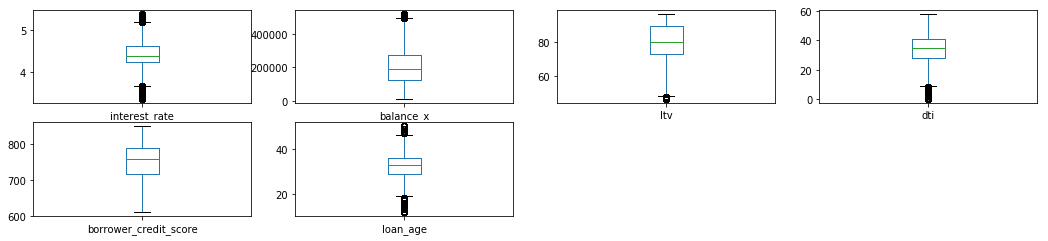

In [22]:
import matplotlib.pyplot as plt
data3.iloc[:,0:20].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,10))
plt.show()

In [23]:
import pandas as pd

data3.to_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/data3_outlier_treated.csv',
             header = True, sep = '|',mode = 'w',index=False)

data3.shape

(1085506, 21)

In [50]:
import pandas as pd

data3 = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/data3_outlier_treated.csv',
                   sep='|',low_memory=False)

data3.shape

(1100917, 21)

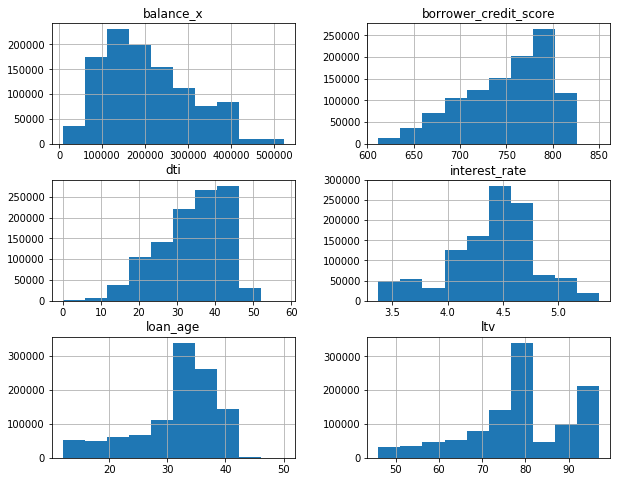

In [35]:
# To see the distributions of the continous variables
import matplotlib.pyplot as plt
data3.iloc[:,0:20].hist(figsize=(10,8))
plt.show()

In [ ]:
import numpy as np
import numpy.ma as ma
from scipy.stats import mstats

x = np.array([1, 2, 3, -1, 5, 7, 3]) #The array needs to be larger than 20, just an example
mx = ma.masked_array(x, mask=[0, 0, 0, 1, 0, 0, 0])
z,pval = mstats.normaltest(mx)

if(pval < 0.055):
    print "Not normal distribution"

In [ ]:
import numpy as np
from scipy.stats import mstats

data_test = data3
z,pval = mstats.normaltest(data_test['ltv'])

print(z)
print(pval)

# if(pval < 0.05):
#     print ("Not normal distribution")

In [ ]:
to_log = ['ltv']

data_test = data3
# apply log(x+1) element-wise to a subset of columns
# df_log = data_test[to_log].applymap(lambda x: np.log(x+1))

data_test= np.log(data3['ltv']+1)
print(data_test)

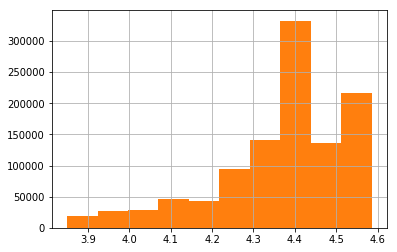

In [66]:
import matplotlib.pyplot as plt
# data3.iloc[:,0:20].hist(figsize=(10,8))
# data_test.hist(column='ltv')
data_test.hist()
plt.show()
# df.hist(column='Trip_distance')

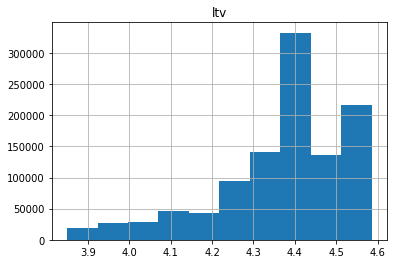

In [54]:
df_log.hist()
plt.show()

In [62]:
# example dataframe
df = pd.DataFrame({'a': [0, 1, 2, 3], 
                   'b': [4, 5, np.nan, 7], 
                   'c': [8, 9, 10, 11]})

# print(df)
# apply log(x+1) element-wise to a subset of columns
to_log = ['a', 'b']
df_log = df[to_log].applymap(lambda x: np.log(x+1))

# print(df_log)

# df_log1 = df[to_log].applymap(lambda x: np.log(x))
# print(df_log1)
# rename columns
df_log.columns = 'log_' + df_log.columns
print(df_log)

# shift the index
df_log.index = df_log.index + 1
print(df_log)

      log_a     log_b
0  0.000000  1.609438
1  0.693147  1.791759
2  1.098612       NaN
3  1.386294  2.079442
      log_a     log_b
1  0.000000  1.609438
2  0.693147  1.791759
3  1.098612       NaN
4  1.386294  2.079442


In [14]:
data3.delinquency_status.unique()

array(['X', '0', '1', '33', '2', '3', '19', 0, '4', '38', '6', '9', '5',
       '13', '28', '11', '7', '17', '15', '22', '14', '8', '30', '27',
       '16', '10', '12', '36', '23', '20', '21', '18', '26', '34', '31',
       '25', '24', '29', '32'], dtype=object)

In [15]:
import numpy as np
data3['delinquency_status'] = np.where(data3['delinquency_status']=='X', '100', data3['delinquency_status'])

In [18]:
data3.delinquency_status.unique()

array([100,   0,   1,  33,   2,   3,  19,   4,  38,   6,   9,   5,  13,
        28,  11,   7,  17,  15,  22,  14,   8,  30,  27,  16,  10,  12,
        36,  23,  20,  21,  18,  26,  34,  31,  25,  24,  29,  32],
      dtype=int64)

In [17]:
data3['delinquency_status'] = data3['delinquency_status'].apply(pd.to_numeric, errors='coerce')
data3.delinquency_status.unique()

array([100,   0,   1,  33,   2,   3,  19,   4,  38,   6,   9,   5,  13,
        28,  11,   7,  17,  15,  22,  14,   8,  30,  27,  16,  10,  12,
        36,  23,  20,  21,  18,  26,  34,  31,  25,  24,  29,  32],
      dtype=int64)

In [ ]:
# data3.shape[0] #1,085,506
data3.shape[1] #21 

In [23]:
data3.iloc[1:5:,0:8]

,channel,seller,interest_rate,balance_x,origination_date,first_payment_date,ltv,dti
1,R,"PNC BANK, N.A.",3.500,276000,01/2014,03/2014,68,35.0
2,R,OTHER,5.000,190000,02/2014,04/2014,80,31.0
3,C,FREEDOM MORTGAGE CORP.,4.375,320000,12/2013,02/2014,80,27.0
4,C,OTHER,5.250,92000,01/2014,03/2014,80,38.0


In [24]:
data3.iloc[1:5:,9:16]

,first_time_homebuyer,loan_purpose,property_type,occupancy_status,property_state,product_type,relocation_mortgage_indicator
1,N,C,SF,P,VT,FRM,N
2,Y,P,SF,P,PA,FRM,N
3,Y,P,PU,P,TX,FRM,N
4,N,P,PU,I,AZ,FRM,N


In [25]:
data3.iloc[1:5:,17:]

,loan_age,maturity_date,delinquency_status,foreclosure_Status
1,40,02/2029,0,0
2,39,03/2044,0,0
3,24,01/2044,100,0
4,40,02/2044,0,0


In [27]:
print(data3.reporting_period.min())# 2014-05-01

print("\n")
print(data3.reporting_period.max()) # 2017-06-01

2014-05-01


2017-06-01


In [130]:
categorical = data3.dtypes[data3.dtypes=="object"].index
print(categorical)
# categorical = data3.dtypes[data3.dtypes == "object"].index
# print(categorical)
# print(data2.shape)

Index(['channel', 'seller', 'origination_date', 'first_payment_date',
       'first_time_homebuyer', 'loan_purpose', 'property_type',
       'occupancy_status', 'property_state', 'product_type',
       'relocation_mortgage_indicator', 'reporting_period', 'maturity_date'],
      dtype='object')


In [28]:
# Create dummy variables

import pandas as pd

categorical_vars=data[['channel','first_time_homebuyer','loan_purpose','property_type','occupancy_status',
                       'product_type','relocation_mortgage_indicator']]

categorical_list = pd.get_dummies(categorical_vars, drop_first=True)
# print(categorical_list.head(5))

print('Before creating dummy variables-',data3.shape)
data4=data3.join(categorical_list)
print('The count of dummy variables-',categorical_list.shape)
print('After creating dummy variables-',data4.shape)

data_vars=data4.columns.values.tolist()
# data_vars
to_keep=[i for i in data_vars if i not in categorical_vars]
# to_keep
data4=data4[to_keep]
data4.columns.values
# print("I am done")

Before creating dummy variables- (1085506, 21)
The count of dummy variables- (1395365, 13)
After creating dummy variables- (1085506, 34)


array(['seller', 'interest_rate', 'balance_x', 'origination_date',
       'first_payment_date', 'ltv', 'dti', 'borrower_credit_score',
       'property_state', 'reporting_period', 'loan_age', 'maturity_date',
       'delinquency_status', 'foreclosure_Status', 'channel_C',
       'channel_R', 'first_time_homebuyer_Y', 'loan_purpose_P',
       'loan_purpose_R', 'loan_purpose_U', 'property_type_CP',
       'property_type_MH', 'property_type_PU', 'property_type_SF',
       'occupancy_status_P', 'occupancy_status_S',
       'relocation_mortgage_indicator_Y'], dtype=object)

In [235]:
data5 = data4
data5['year'] = pd.DatetimeIndex(data4['reporting_period']).year
# data5.year.unique()
data5 = data5.drop(['seller','origination_date','first_payment_date','property_state','reporting_period',
                   'maturity_date',],axis = 1)

print("The number of variables are - ", data5.shape[1])    # 22
print("The number of observations are - ", data5.shape[0]) # 1,100,917
# data3 = data3.fillna(0)

data_final_vars=data5.columns.values.tolist()
y=['foreclosure_Status']
X=[i for i in data_final_vars if i not in y]
# X
# y = [i for i in data_final_vars if i not in X]
# y

The number of variables are -  22
The number of observations are -  1085506


In [ ]:
data5.columns

In [ ]:
# data3.interest_rate = data3.interest_rate.astype(int)
# data3.dti = data3.dti.astype(int)
# data3.borrower_credit_score = data3.borrower_credit_score.astype(int)
# data3.delinquency_status = data3.delinquency_status.astype(float).fillna(0.0)

In [236]:
# Feature Selection and ranking with Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
# rfe = rfe.fit(data3[X], data3[y] )
rfe = rfe.fit(data5[X], data5[y].values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

In [237]:
print(data5.shape)
names = X
print("\n")
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda X: round(X, 4), rfe.ranking_), names)))

(1085506, 22)


Features sorted by their rank:
[(1, 'channel_C'), (1, 'delinquency_status'), (1, 'interest_rate'), (1, 'loan_age'), (1, 'loan_purpose_P'), (1, 'occupancy_status_P'), (1, 'occupancy_status_S'), (1, 'property_type_MH'), (1, 'property_type_SF'), (1, 'relocation_mortgage_indicator_Y'), (2, 'channel_R'), (3, 'first_time_homebuyer_Y'), (4, 'loan_purpose_R'), (5, 'ltv'), (6, 'dti'), (7, 'property_type_CP'), (8, 'property_type_PU'), (9, 'borrower_credit_score'), (10, 'year'), (11, 'balance_x'), (12, 'loan_purpose_U')]


In [275]:
cols=['channel_C','delinquency_status','interest_rate','loan_age','loan_purpose_P',
      'property_type_MH','property_type_SF','relocation_mortgage_indicator_Y',
      'ltv','dti','borrower_credit_score']

y=data5['foreclosure_Status']

In [ ]:
# Implementing the model

# from scipy import stats
# stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# from pandas.core import datetools
# import statsmodels.api as sm
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary())
# # res = mod.fit(maxiter=200)

In [276]:
# Total number of observations -  1,085,506
from sklearn.cross_validation import train_test_split

training_features, test_features,\
training_target, test_target = train_test_split(data5[cols],data5['foreclosure_Status'],test_size=0.3, random_state=0)

# training_features, test_features,\
# training_target, test_target = train_test_split(data5.drop(['foreclosure_Status'],axis =1),
#                                                     data5['foreclosure_Status'],
#                                                     test_size=0.3, random_state=0)

In [ ]:
# training_features.shape #759854 ,21
# test_features.shape #325652,21
# training_target.shape #759854
# test_target.shape #325652

In [ ]:
print (training_target.value_counts())

In [ ]:
print (test_target.value_counts())

In [277]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

In [ ]:
x_train.shape #683,868,21
# x_val.shape #75,986,21
# y_train.shape #683,868
# y_val.shape #75,986

In [ ]:
print (y_train.value_counts())

In [ ]:
print (y_val.value_counts())

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [279]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
print (training_target.value_counts())

In [ ]:
print (training_target.value_counts(), np.bincount(y_train_res))

In [ ]:
x_train_res.shape # (1,366,684, 21)
# y_train_res.shape # (1,366,684)

In [281]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [282]:
print ('Validation Results')
print (clf_rf.score(x_val, y_val))
print (recall_score(y_val, clf_rf.predict(x_val)))
print ('\nTest Results')
print (clf_rf.score(test_features, test_target))
print (recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
0.9996315110678283
0.5806451612903226

Test Results
0.9996560745826834
0.5363636363636364


In [283]:
from sklearn import metrics
clf_lg = LogisticRegression(penalty='l2', C=0.1)
clf_lg.fit(x_train_res, y_train_res)
# logreg = LogisticRegression()
# logreg.fit(x_train_res, y_train_res)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [284]:
print ('Validation Results')
print (clf_lg.score (x_val, y_val))
print (recall_score(y_val, clf_lg.predict(x_val)))
print ('\nTest Results')
print (clf_lg.score(test_features, test_target))
print (recall_score(test_target, clf_lg.predict(test_features)))


Validation Results
0.8821098623430632
0.7903225806451613

Test Results
0.8829855182833208
0.8363636363636363


In [285]:
from sklearn import metrics
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(metrics.accuracy_score(test_target, y_pred)))

Accuracy of logistic regression classifier on test set: 0.88


In [286]:
y_pred = clf_lg.predict(test_features)

In [287]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train_res, y_train_res, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.867


In [288]:
from sklearn.metrics import classification_report
print(classification_report(test_target, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.88      0.94    325432
          1       0.00      0.84      0.01       220

avg / total       1.00      0.88      0.94    325652



In [289]:
df_confusion = pd.crosstab(test_target, y_pred)
df_confusion

col_0,0,1
foreclosure_Status,,
0,287362,38070
1,36,184


In [290]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_lg.predict_proba(test_features)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_target, preds)
roc_auc = metrics.auc(fpr, tpr)

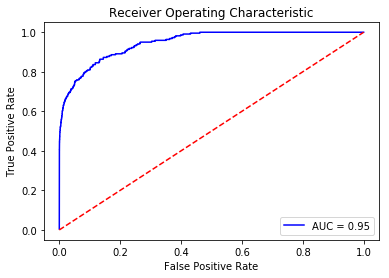

In [291]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [292]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
# predictions = model.predict(test[columns])
# y_pred = clf_lg.predict(test_features)

# Compute error between our test predictions and the actual values.
mean_squared_error(y_pred, test_target)

0.11701448171667915

In [293]:
# Implementing the model
from pandas.core import datetools
import statsmodels.api as sm
logit_model=sm.Logit(y_train_res,x_train_res)
result=logit_model.fit()
print(result.summary())
# res = mod.fit(maxiter=200)

C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.251124
         Iterations: 35


C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1366684
Model:                          Logit   Df Residuals:                  1366673
Method:                           MLE   Df Model:                           10
Date:                Sun, 25 Feb 2018   Pseudo R-squ.:                  0.6377
Time:                        16:47:01   Log-Likelihood:            -3.4321e+05
converged:                      False   LL-Null:                   -9.4731e+05
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4009      0.007     55.197      0.000       0.387       0.415
x2           -23.3612   1203.197     -0.019      0.985   -2381.583    2334.861
x3             2.2273      0.008    283.692      0.0

### Feature Selection
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [211]:
# Feature Selection and ranking with Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
# rfe = rfe.fit(data3[X], data3[y] )
rfe = rfe.fit(data5[X], data5[y].values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

In [233]:
print(data5.shape)
names = X
print("\n")
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda X: round(X, 4), rfe.ranking_), names)))

(1085506, 22)


Features sorted by their rank:
[(1, 'delinquency_status'), (1, 'first_time_homebuyer_Y'), (1, 'foreclosure_Status'), (1, 'interest_rate'), (1, 'loan_age'), (1, 'occupancy_status_P'), (1, 'occupancy_status_S'), (1, 'property_type_CP'), (1, 'property_type_PU'), (1, 'property_type_SF'), (2, 'channel_C'), (3, 'channel_R'), (4, 'loan_purpose_P'), (5, 'ltv'), (6, 'dti'), (7, 'loan_purpose_U'), (8, 'property_type_MH'), (9, 'borrower_credit_score'), (10, 'relocation_mortgage_indicator_Y'), (11, 'balance_x'), (12, 'loan_purpose_R')]


In [228]:
cols=['channel_C','delinquency_status','interest_rate','loan_age','loan_purpose_R',
      'property_type_MH','property_type_SF','relocation_mortgage_indicator_Y',
      'ltv','dti','borrower_credit_score','year','balance_x']

# data_vars=data5.columns.values.tolist()
# data_vars
# to_keep=[i for i in data_vars if i in cols]
# to_keep
# data5=data5[to_keep]
# data5.columns.values
# print("I am done")

# data_final_vars=data5.columns.values.tolist()
# data_final_vars
# y=['foreclosure_Status']
# X=[i for i in data5 if i not in y]
# X

# y
X=data5[cols]
# data3.iloc[1:5:,17:]
# X=data5.iloc[:,0:21]
y=data5['foreclosure_Status']

In [230]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [ ]:
# Implementing the model
from pandas.core import datetools
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())
# res = mod.fit(maxiter=200)


In [ ]:
# Logistic Regression Model Fitting

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
# Predicting the test set results and calculating the accuracy

# accuracy = total correct predictions / total predictions made * 100

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#### Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [ ]:
# Cross Validation

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# Confusion Matrix

# “true positive” for correctly predicted event values.
# “false positive” for incorrectly predicted event values.
# “true negative” for correctly predicted no-event values.
# “false negative” for incorrectly predicted no-event values.

#   			event			no-event
# event		true positive		false positive
# no-event	false negative		true negative

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#### The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

#### The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

#### The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

#### The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

#### The support is the number of occurrences of each class in y_test.


In [ ]:
# Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn import preprocessing

sns.distplot(data3['borrower_credit_score'])
plt.show()

print("Before - skewed value for borrower_credit_score - ",skew(data3.borrower_credit_score))

print(data3['borrower_credit_score'].head())
data3.borrower_credit_score = preprocessing.scale(np.sqrt(data3.borrower_credit_score))
# data3.borrower_credit_score = preprocessing.scale(data3.borrower_credit_score)
print("After - skewed value for borrower_credit_score - ",skew(data3.borrower_credit_score))

sns.distplot(data3['borrower_credit_score'])
plt.show()

# AirTime = preprocessing.scale(np.sqrt(data['AirTime']))
# AirTimeOrig = preprocessing.scale(data['AirTime'])

In [76]:
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox

print("Before - skewed value for balance_x - ",skew(data2.balance_x))
print("Before - skewed value for borrower_credit_score - ",skew(data2.borrower_credit_score))
print("Before - skewed value for dti - ",skew(data2.dti))
print("Before - skewed value for interest_rate - ",skew(data2.interest_rate))
print("Before - skewed value for loan_age - ",skew(data2.loan_age))
print("Before - skewed value for ltv - ",skew(data2.ltv))

data2.balance_x = np.sqrt(data2.balance_x)
data2.borrower_credit_score = np.sqrt(data2.borrower_credit_score)
data2.dti = np.sqrt(data2.dti)
data2.interest_rate = np.sqrt(data2.interest_rate)
data2.loan_age = np.sqrt(data2.loan_age)
data2.ltv = np.sqrt(data2.ltv)

print("After - skewed value for balance_x - ",skew(data2.balance_x))
print("After - skewed value for borrower_credit_score - ",skew(data2.borrower_credit_score))
print("After - skewed value for dti - ",skew(data2.dti))
print("After - skewed value for interest_rate - ",skew(data2.interest_rate))
print("After - skewed value for loan_age - ",skew(data2.loan_age))
print("After - skewed value for ltv - ",skew(data2.ltv))


Before - skewed value for balance_x -  0.9162250781115955
Before - skewed value for borrower_credit_score -  nan
Before - skewed value for dti -  nan
Before - skewed value for interest_rate -  -0.6147628646679654
Before - skewed value for loan_age -  -1.1234767484092216
Before - skewed value for ltv -  -1.1364858110464384
After - skewed value for balance_x -  0.29420130506860503
After - skewed value for borrower_credit_score -  nan
After - skewed value for dti -  nan
After - skewed value for interest_rate -  -0.7770658616254261
After - skewed value for loan_age -  -1.5844255921739432
After - skewed value for ltv -  -1.6194096375642155


In [ ]:
data2.hist(figsize=(18,10))
plt.show()

In [ ]:
import matplotlib.pylab as plt
from scipy.stats import skew
skness = skew(data3.balance_x)
print(skness)

#We draw the histograms 
figure = plt.figure()
figure.add_subplot(121)   
plt.hist(data3.balance_x,facecolor='blue',alpha=0.75) 
plt.xlabel("balance_x - Transformed") 
plt.title("Transformed balance_x Histogram") 
plt.text(2,10000,"Skewness: {0:.2f}".format(skness)) 

figure.add_subplot(122) 
plt.boxplot(data3.balance_x)
plt.title("Large Skewness shows Right Skewed Distribution")
plt.show()

In [ ]:
from scipy.stats import skew
skness = skew(data3.balance_x)
print(skness)

from scipy.stats import boxcox
data3 = boxcox(data3.balance_x)
# print(boxcox_transformed_data)

from scipy.stats import skew
skness1 = skew(data3.balance_x)
print(skness1)

In [ ]:
import scipy
a=scipy.stats.skew(data3,axis=0)

In [ ]:
from scipy import stats
# n, min_max, mean, var, skew, kurt = stats.describe(data2)
# print(data.describe())
print(stats.describe(data2))

In [ ]:
import numpy as np
data3.balance_x = np.log10(data3.balance_x)
# data3.borrower_credit_score = np.log10(data3.borrower_credit_score)
# data3.dti = np.log10(data3.dti)
# data3.loan_age = np.log10(data3.loan_age)
# data3.ltv = np.log10(data3.ltv)
data3.balance_x.hist()
# data3.hist()
# data3.hist(figsize=(15,10))

In [ ]:
data3.borrower_credit_score = np.log(data3.borrower_credit_score)
data3.borrower_credit_score.hist()

In [ ]:
import numpy as np
data3.dti = np.sqrt(data3.dti)
data3.dti.hist()

In [ ]:
data1.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,10))
plt.show()
# data.boxplot(column=['balance_x','balance_y'],sym='r+')
# import matplotlib.pyplot as plt
# %matplotlib inline
# data1.plot(kind='box', figsize=(18,10))
# plt.show()

In [ ]:
import pandas as pd   # to manipulate dataframes
import numpy as np   # to manipulate arrays

# a number "a" from the vector "x" is an outlier if 
# a > median(x)+1.5*iqr(x) or a < median-1.5*iqr(x)
# iqr: interquantile range = third interquantile - first interquantile
def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

# Give the outliers for the first column for example
data1.cltv[outliers(data1.cltv)]
    
# The function return a boolean vector: True if the element is an outlier. False, otherwise.

In [ ]:
# Replace the upper outlier(s) with the 95th percentile and the lower one(s) with the 5th percentile 
def replace(x):   # x is a vector
    out = x[outliers(x)]
    return x.replace(to_replace = [out.min(),out.max()],value = [np.percentile(x,5),np.percentile(x,95)])

# Apply replace() on each column of the dataframe
df = df.apply(replace,axis=1)

# Now, to replace the upper and lower outliers, let's write another small function and apply it on all the dataframe:

In [ ]:
# Finally, remove the rows containing any outlier:
df = df[~df.apply(outliers).any(axis=1)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# sns.countplot(x='foreclosure_Status',data=data,palette='hls')
sns.countplot(x='foreclosure_Status',data=data,palette='pie')
plt.show()

In [ ]:
data.groupby('foreclosure_Status').mean()

In [ ]:
# data.columns
data.dtypes

In [ ]:
data.groupby(['foreclosure_Status','channel']).mean()

In [ ]:
data.groupby('property_type').mean()

In [ ]:
%matplotlib inline
# pd.crosstab(data.property_type,data.foreclosure_Status)
# pd.crosstab(data.property_type,data.foreclosure_Status).apply(lambda c: c/c.sum()*100, axis=1)
pd.crosstab(data.property_type,data.foreclosure_Status).plot(kind='bar',stacked=True)
# plt.title('Title heading')
# plt.xlabel('property_type')
# plt.ylabel('Y variable')
#plt.savefig('purchase_fre_job')

In [24]:
%matplotlib inline
pd.crosstab(data.property_type,data.foreclosure_Status).apply(lambda c: c/c.sum()*100, axis=0)
# pd.crosstab(data.loan_purpose,data.foreclosure_Status).apply(lambda c: c/c.sum()*100, axis=0)

foreclosure_Status,0,1
property_type,,
CO,9.642669,6.772009
CP,0.490936,0.112867
MH,0.650279,1.805869
PU,27.059497,17.720090
SF,62.156619,73.589165


In [ ]:
table=pd.crosstab(data.loan_purpose,data.foreclosure_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

In [ ]:
table=pd.crosstab(data.occupancy_status,data.foreclosure_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

In [ ]:
pd.crosstab(data.product_type,data.foreclosure_Status).plot(kind='bar',stacked=True)
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_fre_month_bar')

In [ ]:
data.loan_purpose.hist()
plt.title('Histogram of loan_purpose')
plt.xlabel('loan_purpose')
plt.ylabel('Frequency')
#plt.savefig('hist_loan_purpose')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="cltv",by="foreclosure_Status")
data.hist(column="cltv",by="foreclosure_Status",bins=30)

###### Synthetic Minority Oversampling Technique

At a high level, SMOTE creates synthetic observations of the minority class (bad loans) by:

Finding the k-nearest-neighbors for minority class observations (finding similar observations)
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.
After upsampling to a class ratio of 1.0, I should have a balanced dataset. There’s no need (and often it’s not smart) to balance the classes, but it magnifies the issue caused by incorrectly timed oversampling.

https://beckernick.github.io/oversampling-modeling/

###### Compute precision, recall, F-measure and support

To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

###### Mean squared error
Basically, we subtract each predicted value from the actual value, square the differences,
and add them together. Then we divide the result by the total number of predicted values. 
This will give us the average error for each prediction.

###### What is complete separation and what do some of the most commonly used software packages do when it happens?
A complete separation happens when the outcome variable separates a predictor variable or a combination of predictor variables completely. Albert and Anderson (1984) define this as, “there is a vector α that correctly allocates all observations to their group.”

What happens when we try to fit a logistic or a probit regression model of Y on X1 and X2? Mathematically the maximum likelihood estimate for X1 does not exist. In particular with this example, the larger the coefficient for X1, the larger the likelihood. In other words, the coefficient for X1 should be as large as it can be, which would be infinity!  In terms of the behavior of statistical software packages, below is what SAS (version 9.2), SPSS (version 18), Stata (version 11) and R (version 2.11.1) do when we run the model on the sample data. We present these results here in the hope that some level of understanding of the behavior of logistic/probit  regression when using our familiar software package might help us identify the problem of complete separation more efficiently.

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/

###### Quasi-complete separation in a logistic/probit regression happens when the outcome variable separates a predictor variable or a combination of predictor variables to certain degree.

What happens when we try to fit a logistic or a probit regression model of Y on X1 and X2 using the data above? It turns out that the maximum likelihood estimate for X1 does not exist. With this example, the larger the parameter for X1, the larger the likelihood. In practice, a value of 15 or larger does not make much difference and they all basically correspond to predicted probability of 1. The behavior of different statistical software packages differ at how they deal with the issue of quasi-complete separation. Below is what each package of SAS, SPSS, Stata and R does with our sample data and the logistic regression model of Y on X1 and X2. We present these results here in the hope that some level of understanding of the behavior of logistic/probit regression within our familiar software package might help us identify the problem of separation more efficiently.

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/

###### What are the techniques for dealing with complete separation or quasi-complete separation?

In the case of complete separation, make sure that the outcome variable is not a dichotomous version of a variable in the model.

If it is quasi-complete separation, the easiest strategy is the "Do nothing" strategy. This is because that the maximum 
likelihood for other predictor variables are still valid. The drawback is that we don’t get any reasonable estimate for 
the variable X that actually predicts the outcome variable effectively.  This strategy does not work well for the situation 
of complete separation.

Another simple strategy is to not include X in the model. The problem is that this leads to biased estimates for the 
other predictor variables in the model. Thus, this is not a recommended strategy.

Possibly we might be able to collapse some categories of X if X is a categorical variable and if it makes substantive 
sense to do so.

Exact method is a good strategy when the data set is small and the model is not very large. Below is a sample code in SAS. 
proc logistic data = t2 descending;
  model y = x1 x2;
  exact x1 / estimate=both;
run;

Firth logistic regression is another good strategy. It uses a penalized likelihood estimation method. Firth bias-correction 
is considered as an ideal solution to separation issue for logistic regression. For more information on logistic regression 
using Firth bias-correction,  we refer our readers to the article by Georg Heinze and Michael Schemper.
proc logistic data = t2 descending;
  model y = x1 x2 /firth;
run;

Bayesian method can be used when we have some additional information on the parameter estimates of the predictor va.

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/

###### Feature Selection
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/text_analytics/general_concepts.html
http://wiki.fast.ai/index.php/Logistic_Regression
http://www.bogotobogo.com/python/scikit-learn/logistic_regression.php
https://github.com/jalajthanaki/credit-risk-modelling/blob/master/Credit%20Risk%20Analysis.ipynb